# Languages of research articles in SciELO Brazil

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

## Loading the data

In the column names simplification notebook
we can find this function:

In [2]:
def normalize_column_title(name):
    import re
    name_unbracketed = re.sub(r".*\((.*)\)", r"\1",
                              name.replace("(in months)", "in_months"))
    words = re.sub("[^a-z0-9+_ ]", "", name_unbracketed.lower()).split()
    ignored_words = ("at", "the", "of", "and", "google", "scholar", "+")
    replacements = {
        "document": "doc",
        "documents": "docs",
        "frequency": "freq",
        "language": "lang",
    }
    return "_".join(replacements.get(word, word)
                    for word in words if word not in ignored_words) \
              .replace("title_is", "is")

Loading the `documents_languages.csv`
regarding the SciELO Brazil collection,
and applying the column names simplification function:

In [3]:
dataset = pd.read_csv("tabs_bra/documents_languages.csv") \
            .rename(columns=normalize_column_title)
print(dataset.shape)
dataset.columns

(368491, 26)


Index(['extraction_date', 'study_unit', 'collection', 'issn_scielo', 'issns',
       'title_scielo', 'title_thematic_areas', 'is_agricultural_sciences',
       'is_applied_social_sciences', 'is_biological_sciences',
       'is_engineering', 'is_exact_earth_sciences', 'is_health_sciences',
       'is_human_sciences', 'is_linguistics_letters_arts',
       'is_multidisciplinary', 'title_current_status', 'pid_scielo',
       'doc_publishing_year', 'doc_is_citable', 'doc_type', 'doc_languages',
       'doc_pt', 'doc_es', 'doc_en', 'doc_other_languages'],
      dtype='object')

In [4]:
dataset.head(3).T

,0,1,2
extraction_date,2018-09-13,2018-09-13,2018-09-13
study_unit,document,document,document
collection,scl,scl,scl
issn_scielo,0100-879X,0100-879X,0100-879X
issns,0100-879X;1414-431X,0100-879X;1414-431X,0100-879X;1414-431X
title_scielo,Brazilian Journal of Medical and Biological Re...,Brazilian Journal of Medical and Biological Re...,Brazilian Journal of Medical and Biological Re...
title_thematic_areas,Biological Sciences;Health Sciences,Biological Sciences;Health Sciences,Biological Sciences;Health Sciences
is_agricultural_sciences,0,0,0
is_applied_social_sciences,0,0,0
is_biological_sciences,1,1,1


## Types of documents

Most documents are research articles,
we'll continue by just looking to this subset of the data:

,doc_type
research-article,308006
editorial,13114
case-report,7505
book-review,6940
review-article,6738
rapid-communication,6627
undefined,4908
brief-report,3906
letter,3435
abstract,2930


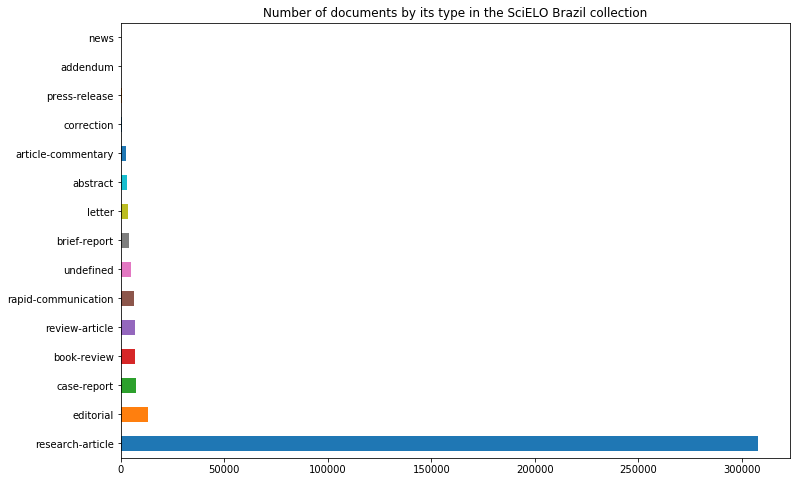

In [5]:
doc_types_counts = dataset["doc_type"].value_counts()
doc_types_counts.plot.barh(figsize=(12, 8),
                           title="Number of documents by its type "
                                 "in the SciELO Brazil collection")
pd.DataFrame(doc_types_counts)

In [6]:
dataset_ra = dataset[dataset["doc_type"] == "research-article"]

## Set of languages

Each article is written in some set of languages,
written as `;`-separated entries:

In [7]:
dataset_ra["doc_languages"].unique()

array(['en', 'pt', 'es', 'fr', 'en;pt', 'pt;es', 'es;pt', 'fr;pt',
       'en;es;pt', 'en;es', 'it', 'en;pt;es', 'it;pt', 'de;al', 'pt;la',
       'de', 'fr;en;pt', 'de;pt', 'de;es', 'fr;en', 'en;it;pt'],
      dtype=object)

The distribution of \[disjoint\] sets of research articles
divided by the set of languages they're written in is:

,doc_languages
{pt},163858
{en},103199
"{en, pt}",31065
{es},5841
"{es, en, pt}",2913
"{es, en}",484
{fr},346
"{fr, pt}",106
{de},64
{it},61


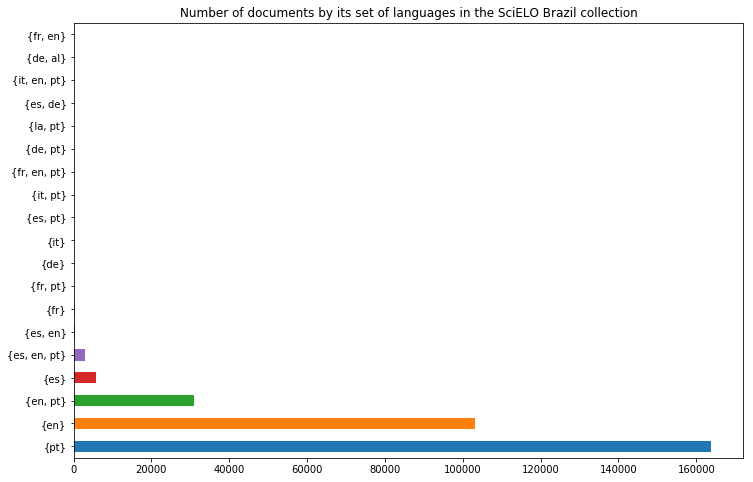

In [8]:
langs_sets = dataset_ra["doc_languages"].str.lower().str.split(";").apply(set)
doc_langs_counts = langs_sets.value_counts()
doc_langs_counts.plot.barh(figsize=(12, 8),
                           title="Number of documents by its set of languages "
                                 "in the SciELO Brazil collection")
pd.DataFrame(doc_langs_counts)

We can say an article is multi-language
if it's available in at least 3 languages.

# Multiple languages in time

The quantity of articles with multiple languages seem to be getting higher
when we see them by the publication year.

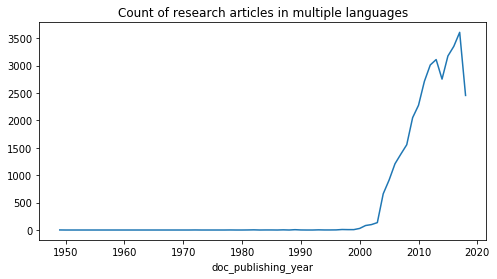

In [9]:
dataset_ramf = dataset_ra.assign(
    multi_language=dataset_ra["doc_languages"].str.contains(";"),
)
np.trim_zeros(dataset_ramf.groupby("doc_publishing_year")["multi_language"]
                          .sum()
).plot.line(
    figsize=(8, 4),
    title="Count of research articles in multiple languages",
);

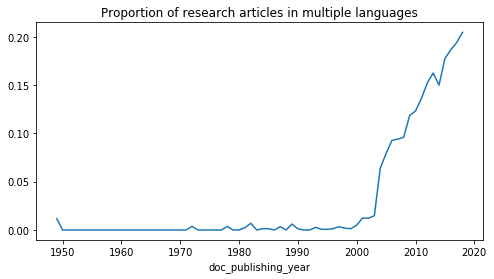

In [10]:
np.trim_zeros(dataset_ramf.groupby("doc_publishing_year")["multi_language"]
                          .mean()
).plot.line(
    figsize=(8, 4),
    title="Proportion of research articles in multiple languages",
);

Can we split by both the publishing and indexing years?

### Getting the indexing year

The indexing year can only be found in the journal spreadsheet,
in the `inclusion_year_scielo`.

In [11]:
journals = pd.read_csv("tabs_bra/journals.csv") \
             .rename(columns=normalize_column_title)
print(journals.shape)
journals.columns

(366, 98)


Index(['extraction_date', 'study_unit', 'collection', 'issn_scielo', 'issns',
       'title_scielo', 'title_thematic_areas', 'is_agricultural_sciences',
       'is_applied_social_sciences', 'is_biological_sciences',
       'is_engineering', 'is_exact_earth_sciences', 'is_health_sciences',
       'is_human_sciences', 'is_linguistics_letters_arts',
       'is_multidisciplinary', 'title_current_status', 'title_subtitle_scielo',
       'short_title_scielo', 'short_iso', 'title_pubmed', 'publisher_name',
       'use_license', 'alpha_freq', 'numeric_freq_in_months',
       'inclusion_year_scielo', 'stopping_year_scielo', 'stopping_reason',
       'date_first_doc', 'volume_first_doc', 'issue_first_doc',
       'date_last_doc', 'volume_last_doc', 'issue_last_doc', 'total_issues',
       'issues_2018', 'issues_2017', 'issues_2016', 'issues_2015',
       'issues_2014', 'issues_2013', 'total_regular_issues',
       'regular_issues_2018', 'regular_issues_2017', 'regular_issues_2016',
       'regul

This is the joined dataset:

In [12]:
mdataset = pd.merge(dataset, journals, on="issn_scielo", how="left")
mdataset.shape

(368491, 123)

Fields with an `_x` suffix regards to the document,
whereas fields with `_y` regards to the journal.
Fields that aren't in both dataframes
appear without any extra suffix.

In [13]:
mdataset.columns

Index(['extraction_date_x', 'study_unit_x', 'collection_x', 'issn_scielo',
       'issns_x', 'title_scielo_x', 'title_thematic_areas_x',
       'is_agricultural_sciences_x', 'is_applied_social_sciences_x',
       'is_biological_sciences_x',
       ...
       'h5_2016', 'h5_2015', 'h5_2014', 'h5_2013', 'm5_2018', 'm5_2017',
       'm5_2016', 'm5_2015', 'm5_2014', 'm5_2013'],
      dtype='object', length=123)

### Document count by indexing year and publication year

We can see the quantity of documents
by the year of journal indexing
and the year of document publication.

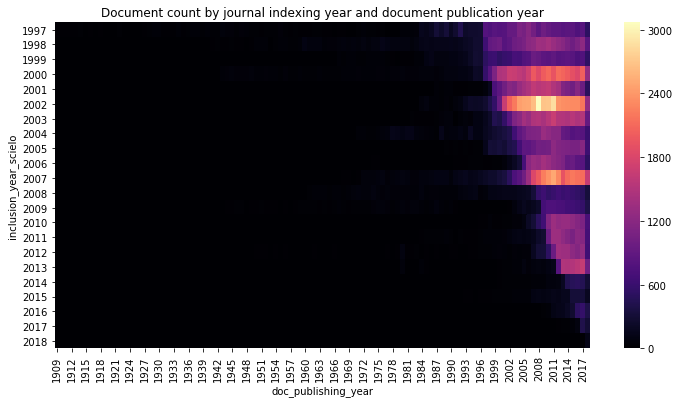

In [14]:
years_mdataset = (mdataset
    .groupby(["inclusion_year_scielo", "doc_publishing_year"])
    .size()
    .unstack("doc_publishing_year")
    .fillna(0)
    .astype(int)
)
plt.figure(figsize=(12, 6))
sns.heatmap(years_mdataset, cmap="magma") \
   .set(title="Document count by journal indexing year "
              "and document publication year");

The same map, but only for 2007 onwards:

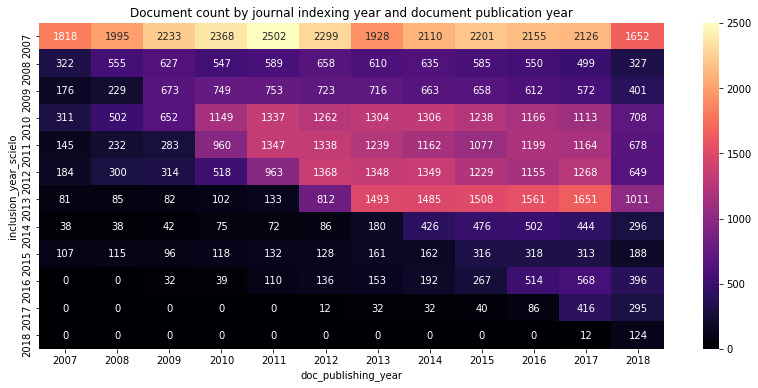

In [15]:
plt.figure(figsize=(14, 6))
sns.heatmap(years_mdataset.loc[2007:, 2007:], cmap="magma",
            annot=True, fmt="g") \
   .set(title="Document count by journal indexing year "
              "and document publication year");

Filtering by research articles, we get almost the same:

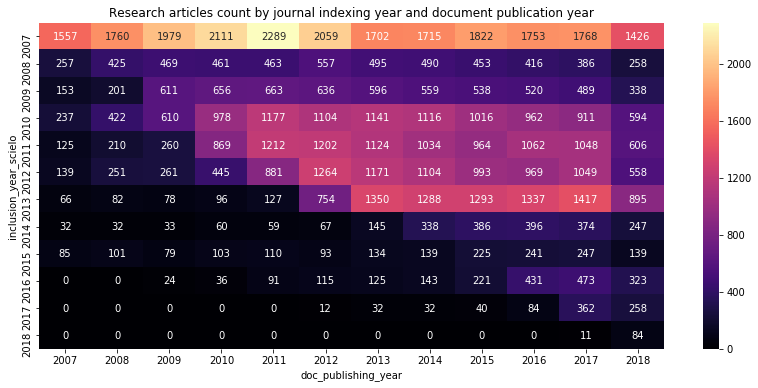

In [16]:
mdataset_ra = mdataset[mdataset["doc_type"] == "research-article"]
years_mdataset_ra = (mdataset_ra
    .groupby(["inclusion_year_scielo", "doc_publishing_year"])
    .size()
    .unstack("doc_publishing_year")
    .fillna(0)
    .astype(int)
)
plt.figure(figsize=(14, 6))
sns.heatmap(years_mdataset_ra.loc[2007:, 2007:], cmap="magma",
            annot=True, fmt="g") \
   .set(title="Research articles count by journal indexing year "
              "and document publication year");

### Multiple languages by indexing year and publication year

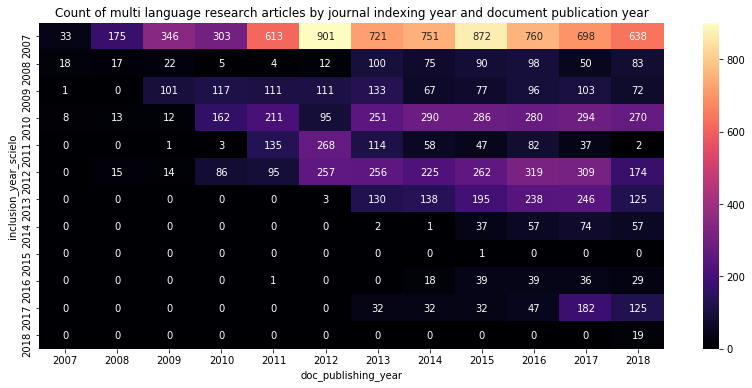

In [17]:
mdataset_ramf = mdataset_ra.assign(
    multi_language=dataset_ra["doc_languages"].str.contains(";"),
)
years_mdataset_ramf_sum = (mdataset_ramf
    .groupby(["inclusion_year_scielo", "doc_publishing_year"])
    ["multi_language"]
    .sum()
    .unstack("doc_publishing_year")
    .fillna(0)
    .astype(int)
)
plt.figure(figsize=(14, 6))
sns.heatmap(years_mdataset_ramf_sum.loc[2007:, 2007:], cmap="magma",
            annot=True, fmt="g") \
   .set(title="Count of multi language research articles "
              "by journal indexing year "
              "and document publication year");

Zooming out:

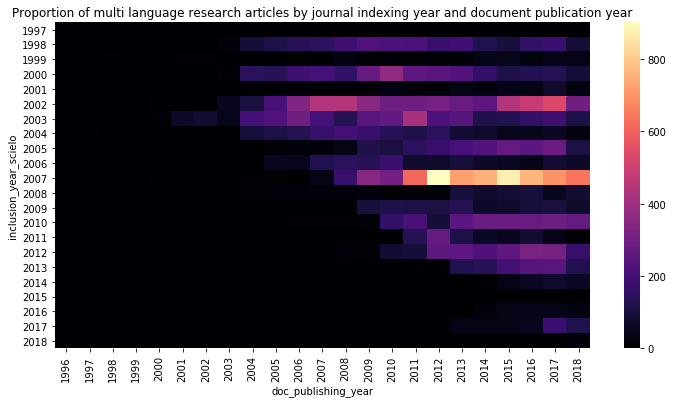

In [18]:
plt.figure(figsize=(12, 6))
sns.heatmap(years_mdataset_ramf_sum.loc[:, 1996:], cmap="magma") \
   .set(title="Proportion of multi language research articles "
              "by journal indexing year "
              "and document publication year");

The raw count is probably not enough for understanding what's going on.
Let's see the proportion.

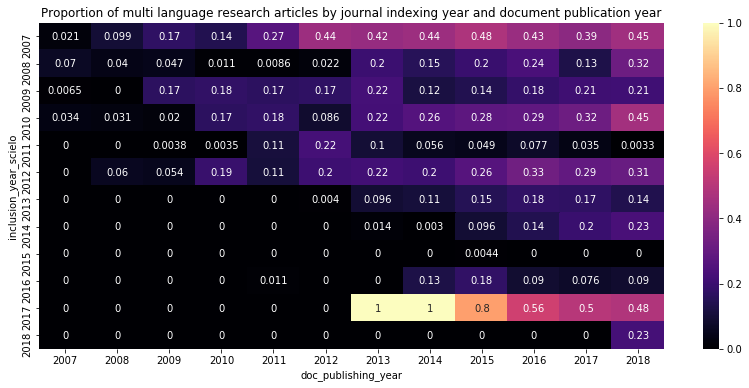

In [19]:
years_mdataset_ramf_mean = (mdataset_ramf
    .groupby(["inclusion_year_scielo", "doc_publishing_year"])
    ["multi_language"]
    .mean()
    .unstack("doc_publishing_year")
    .fillna(0.)
)
plt.figure(figsize=(14, 6))
sns.heatmap(years_mdataset_ramf_mean.loc[2007:, 2007:], cmap="magma",
            annot=True) \
   .set(title="Proportion of multi language research articles "
              "by journal indexing year "
              "and document publication year");

Zooming out:

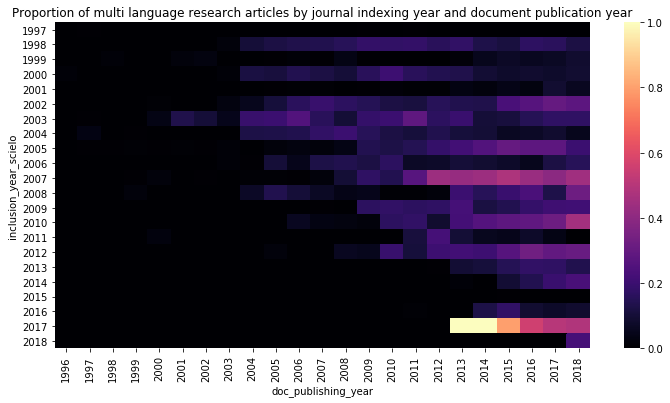

In [20]:
plt.figure(figsize=(12, 6))
sns.heatmap(years_mdataset_ramf_mean.loc[:, 1996:], cmap="magma") \
   .set(title="Proportion of multi language research articles "
              "by journal indexing year "
              "and document publication year");

The same as above, but as line plots:

In [21]:
def add_markers(ax):
    for line, marker in zip(ax.get_lines(), "v^<>spP*hHoxXDd8234+1.,"):
        line.set_marker(marker)
    ax.legend()

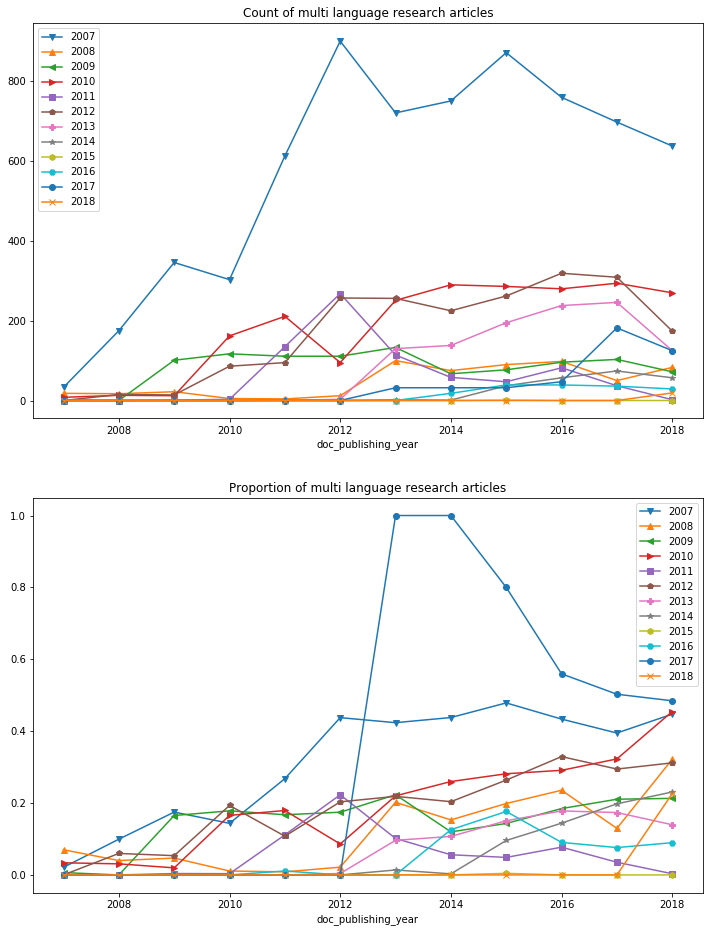

In [22]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12, 16))

years_mdataset_ramf_sum.loc[2007:, 2007:].T.plot(ax=ax1)
ax1.set(title="Count of multi language research articles")
add_markers(ax1)

years_mdataset_ramf_mean.loc[2007:, 2007:].T.plot(ax=ax2)
ax2.set(title="Proportion of multi language research articles")
add_markers(ax2)

## Thematic area

These are the fields for each area,
besides the `_x` or `_y` suffix:

In [23]:
areas = ["is_agricultural_sciences",
         "is_applied_social_sciences",
         "is_biological_sciences",
         "is_engineering",
         "is_exact_earth_sciences",
         "is_health_sciences",
         "is_human_sciences",
         "is_linguistics_letters_arts"]
areaswm = areas + ["is_multidisciplinary"]

This new `trm` dataset:

* Has an entry copy for each *thematic area* of a document;
* Is filtered by *research articles*, having no other document type;
* Includes a *`multi_language` field*,
  besides specific flag fields for the `pt`, `es` and `en` languages.

In [24]:
trm = pd.concat([
    mdataset_ramf[mdataset_ramf[area + "_x"] == 1]
                 [["inclusion_year_scielo", "doc_publishing_year",
                   "multi_language", "doc_pt", "doc_es", "doc_en"]]
                 .assign(area=area[3:])
    for area in areaswm
]).reset_index(drop=True)
print(trm.shape)
trm[::50_000]

(372208, 7)


,inclusion_year_scielo,doc_publishing_year,multi_language,doc_pt,doc_es,doc_en,area
0,1998,1998,False,1,0,0,agricultural_sciences
50000,2012,2011,False,0,0,1,agricultural_sciences
100000,2006,2007,False,1,0,0,biological_sciences
150000,2011,2016,False,1,0,0,engineering
200000,2000,2006,True,1,0,1,health_sciences
250000,1998,2012,False,0,0,1,health_sciences
300000,2008,2017,True,1,0,1,health_sciences
350000,2012,2016,True,1,0,1,human_sciences


With that data, we can see some language statistics for each area.
But, first, what's the number of research articles on each thematic area?

*Note*:
The proportion based on the total count is beyond $100\%$,
since there are articles in more than one thematic area.

,count,proportion
health_sciences,129204,0.419485
agricultural_sciences,69143,0.224486
human_sciences,54581,0.177208
biological_sciences,47412,0.153932
engineering,21148,0.068661
exact_earth_sciences,20288,0.065869
applied_social_sciences,17736,0.057583
multidisciplinary,8355,0.027126
linguistics_letters_arts,4341,0.014094


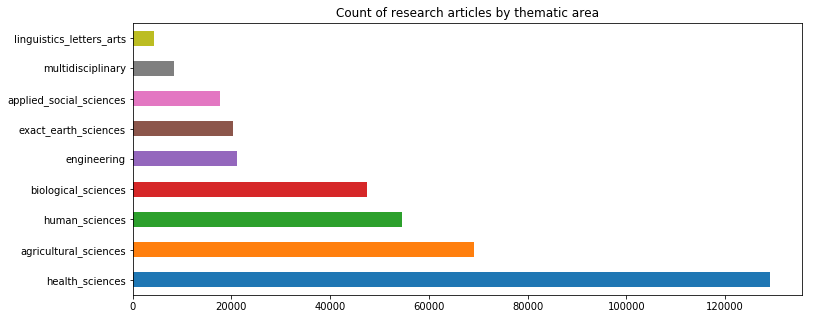

In [25]:
trm_area_counts = trm["area"].value_counts().rename("count")
trm_area_counts.plot.barh(
    figsize=(12, 5),
    title="Count of research articles by thematic area",
)
pd.DataFrame(trm_area_counts).assign(
    proportion=trm_area_counts / mdataset_ramf.shape[0],
)

Now let's see, for each thematic area,
the multi-language document count
by both the journal indexing year and the document publishing year,
besides a proportion based on the total document count
for the specific thematic area.

In [26]:
years_trm = (trm
    .groupby(["area", "inclusion_year_scielo", "doc_publishing_year"])
    ["multi_language"]
    .agg(["sum", "mean"])
    .unstack("inclusion_year_scielo")
    .fillna(0)
).T

That's the full matrix of counts and proportions by area.
Let's see it with some heatmaps.

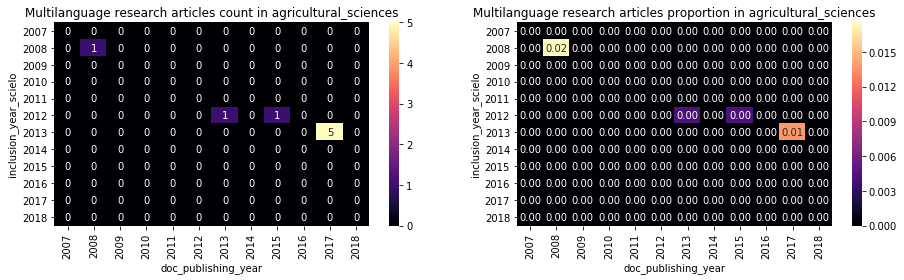

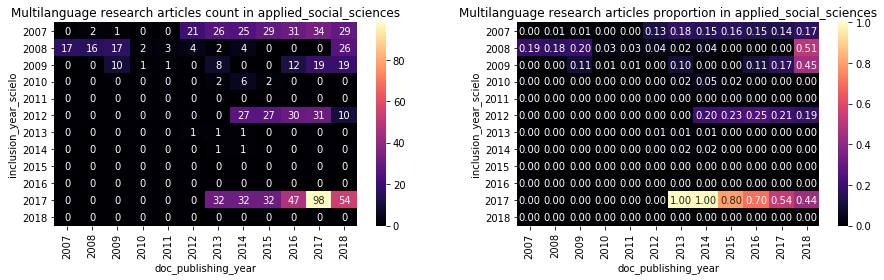

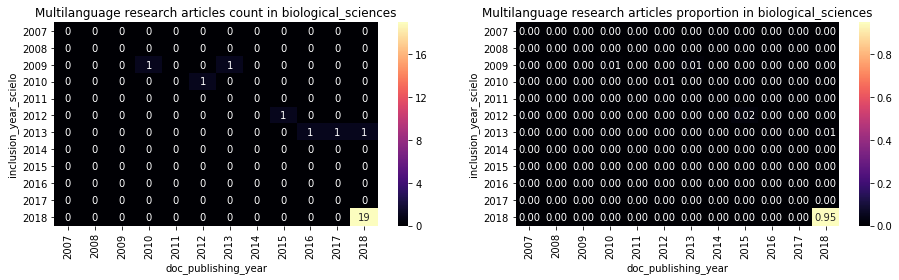

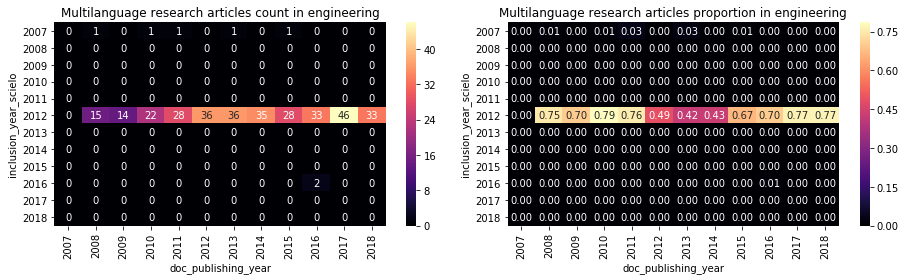

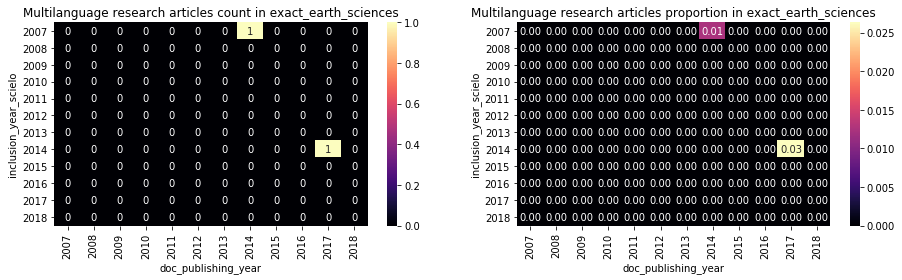

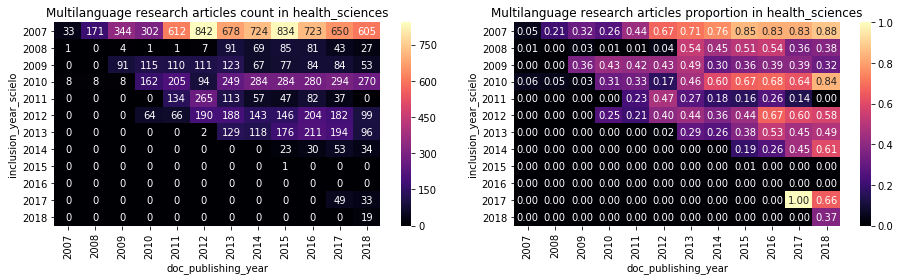

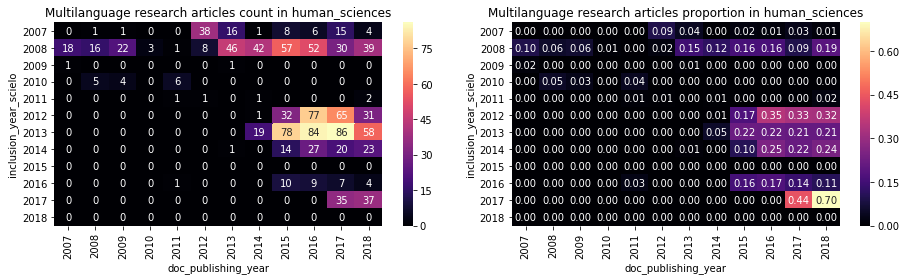

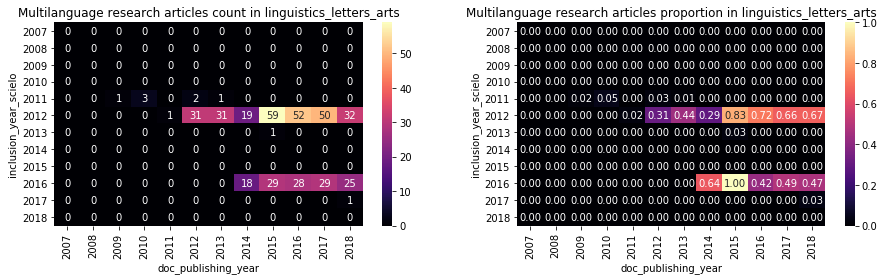

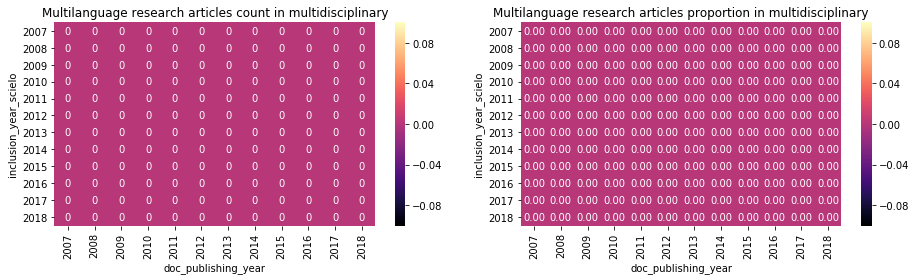

In [27]:
for field in areaswm:
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13, 4))
    area = field[3:]
    sns.heatmap(years_trm.xs(area, 1).xs("sum").loc[2007:, 2007:],
                cmap="magma", annot=True, fmt="g", ax=ax1) \
       .set(title=f"Multilanguage research articles count in {area}")
    sns.heatmap(years_trm.xs(area, 1).xs("mean").loc[2007:, 2007:],
                cmap="magma", annot=True, fmt=".02f", ax=ax2) \
       .set(title=f"Multilanguage research articles proportion "
                  f"in {area}")
    fig.tight_layout()

Zooming out to see the big picture:

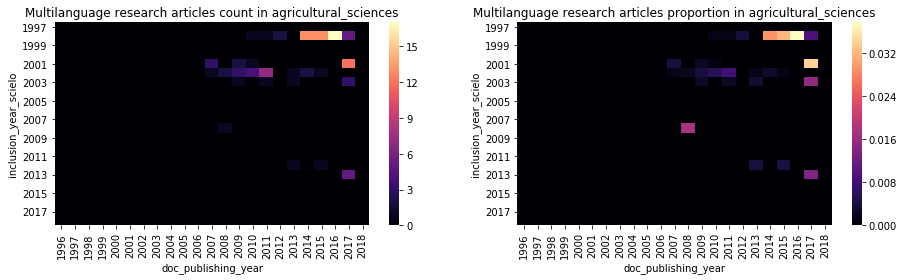

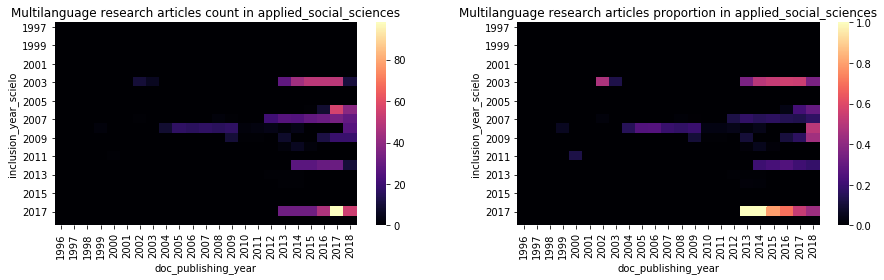

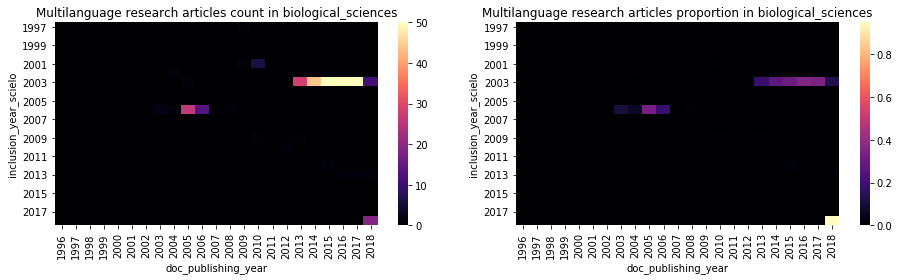

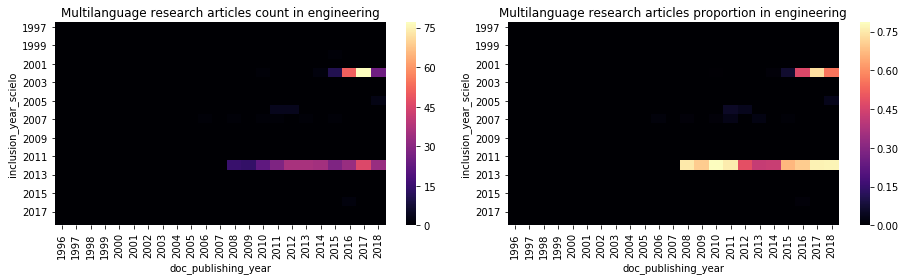

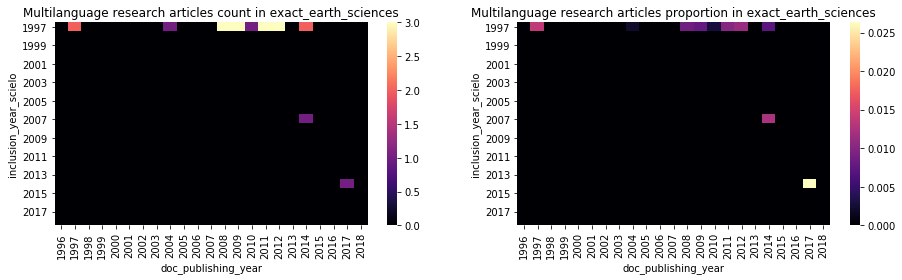

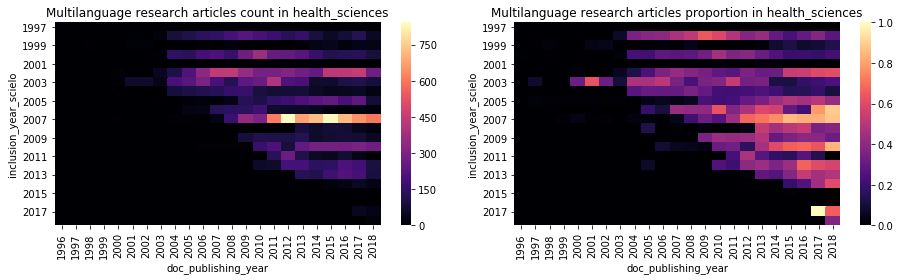

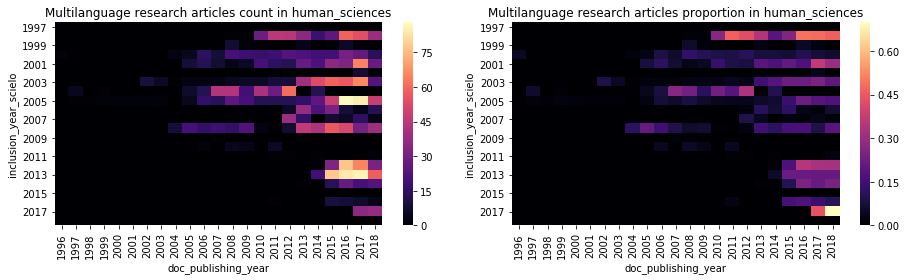

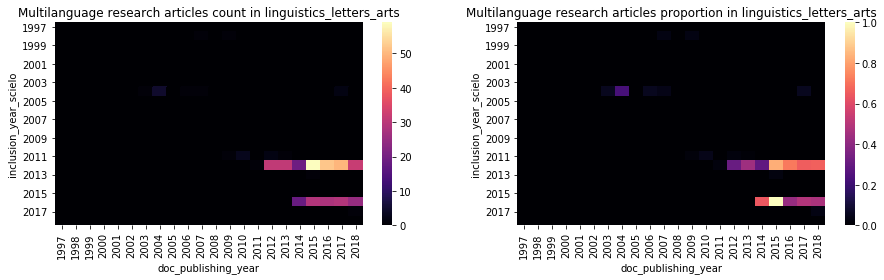

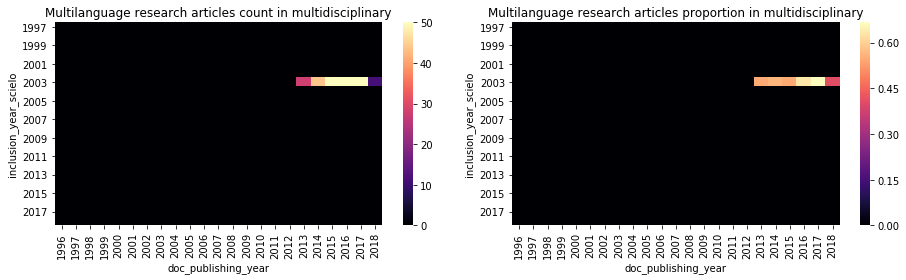

In [28]:
for field in areaswm:
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13, 4))
    area = field[3:]
    sns.heatmap(years_trm.xs(area, 1).xs("sum").loc[:, 1996:],
                cmap="magma", ax=ax1) \
       .set(title=f"Multilanguage research articles count in {area}")
    sns.heatmap(years_trm.xs(area, 1).xs("mean").loc[:, 1996:],
                cmap="magma", ax=ax2) \
       .set(title=f"Multilanguage research articles proportion "
                  f"in {area}")
    fig.tight_layout()

## Number of published articles by thematic area in `en`, `es` and `pt`

Using the same technique from when we created the `trm` dataframe,
we can see the number of published articles by the $3$ languages
that have its own column:

* `en`: English;
* `es`: Spanish;
* `pt`: Portuguese.

In [29]:
langs = ["en", "es", "pt"]
trlangsum = pd.concat([
    trm[trm["doc_" + lang] == 1]
       [["area", "doc_publishing_year"]]
       .assign(lang=lang)
    for lang in langs
]).groupby(["area", "lang", "doc_publishing_year"]) \
  .size().rename("count").reset_index()
print(trlangsum.shape)
trlangsum[::200]

(1274, 4)


,area,lang,doc_publishing_year,count
0,agricultural_sciences,en,1942,1
200,applied_social_sciences,es,2011,44
400,biological_sciences,pt,1911,16
600,exact_earth_sciences,en,1971,6
800,health_sciences,en,1983,46
1000,health_sciences,pt,2010,5409
1200,multidisciplinary,en,2012,297


This data is what we wish to plot.

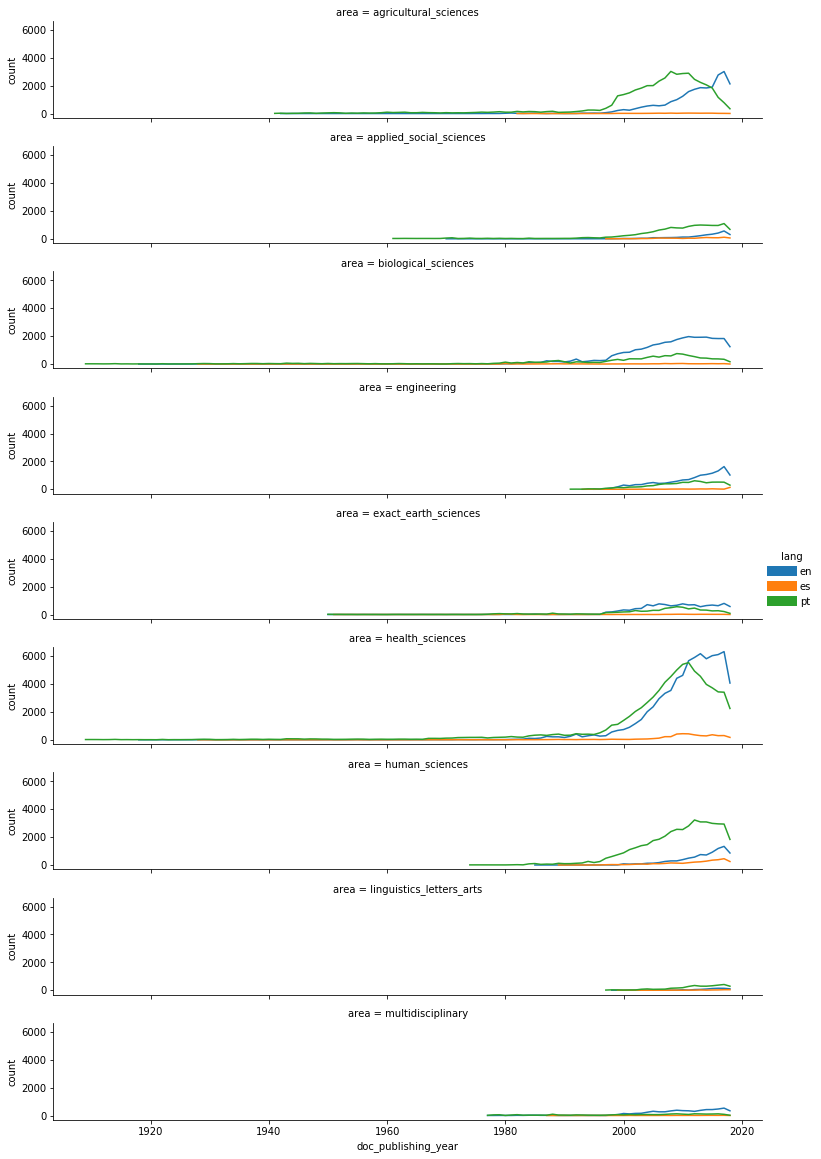

In [30]:
sns.FacetGrid(trlangsum, hue="lang", row="area", aspect=6, height=1.8) \
   .map(sns.lineplot, "doc_publishing_year", "count") \
   .add_legend()
for legend_line in plt.gcf().legends[0].legendHandles:
    legend_line.set_linewidth(10)

The same, from $1990$ and without a shared y axis:

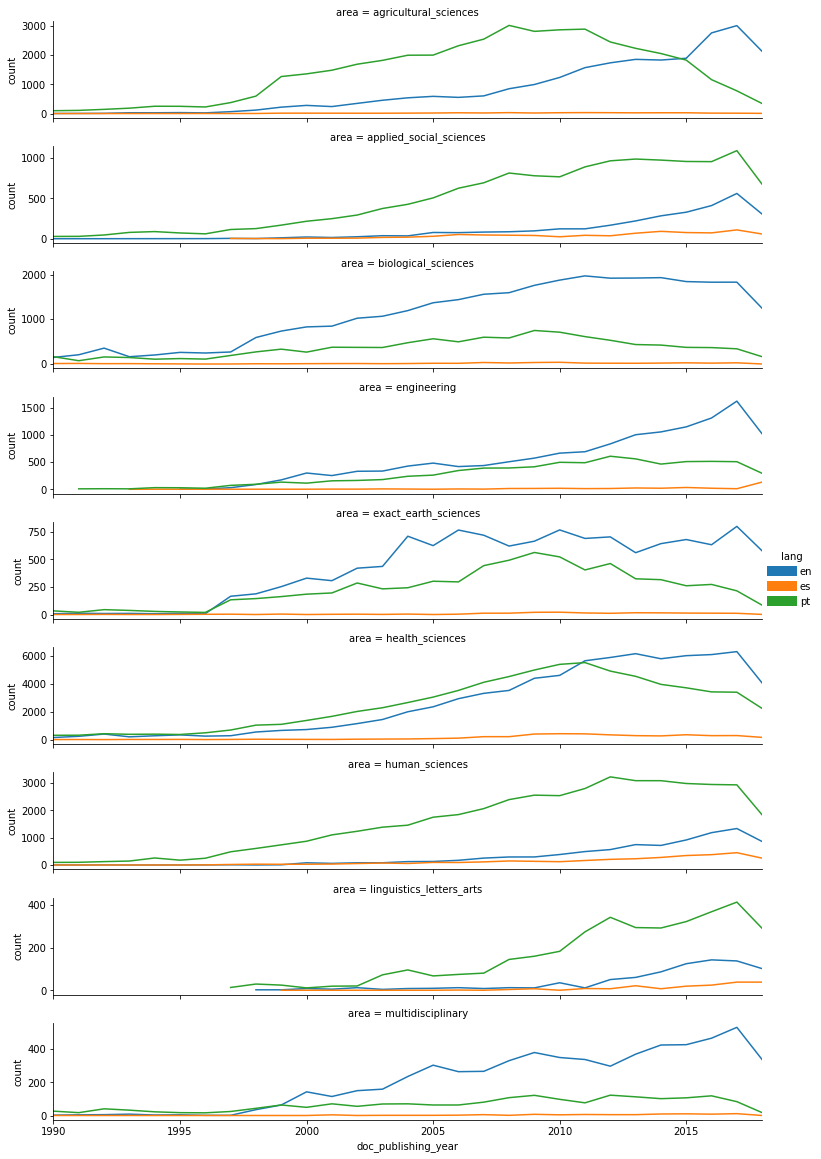

In [31]:
sns.FacetGrid(trlangsum, hue="lang", row="area",
              aspect=6, height=1.8, sharey=False) \
   .map(sns.lineplot, "doc_publishing_year", "count") \
   .add_legend() \
   .set(xlim=[1990, 2018]);
for legend_line in plt.gcf().legends[0].legendHandles:
    legend_line.set_linewidth(10)

Instead, we might want to see the proportion of thematic areas
in some specific language.
We can plot a heat map to see this.

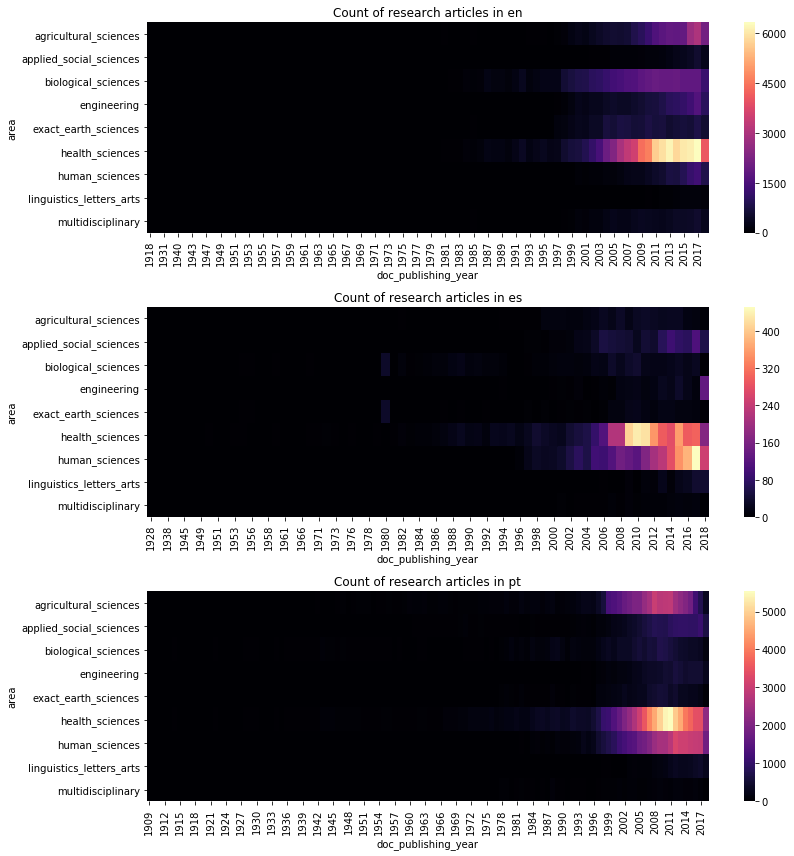

In [32]:
fig, axes = plt.subplots(nrows=len(langs), figsize=(12, 12))
for lang, ax in zip(langs, axes):
    data = trlangsum[trlangsum["lang"] == lang] \
               .pivot(index="area",
                      columns="doc_publishing_year",
                      values="count") \
               .fillna(0)
    sns.heatmap(data, cmap="magma", ax=ax) \
       .set(title=f"Count of research articles in {lang}")
fig.tight_layout()

The same, from $1990$:

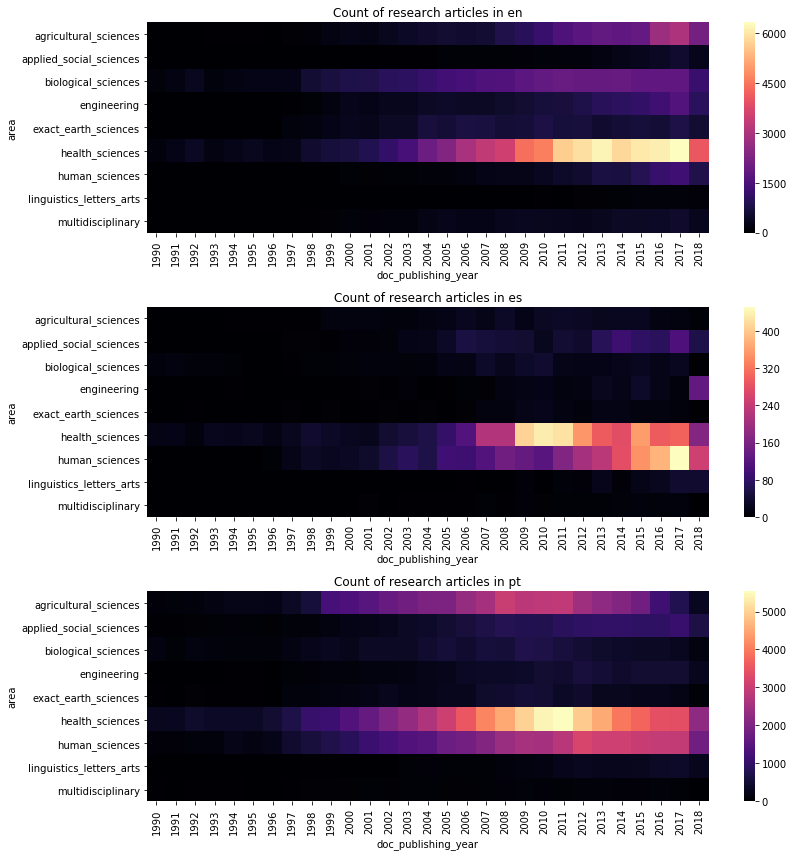

In [33]:
fig, axes = plt.subplots(nrows=len(langs), figsize=(12, 12))
for lang, ax in zip(langs, axes):
    data = trlangsum[(trlangsum["lang"] == lang) &
                     (trlangsum["doc_publishing_year"] >= 1990)] \
               .pivot(index="area",
                      columns="doc_publishing_year",
                      values="count") \
               .fillna(0)
    sns.heatmap(data, cmap="magma", ax=ax) \
       .set(title=f"Count of research articles in {lang}")
fig.tight_layout()